# Decision Tree & Random Forest

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set/data
df = pd.read_csv('./data/car_evaluation.csv', header=None)
df.columns = ['buying_price', 'maintenance_cost', 'doors', 'persons', 'lug_boot', 'safety', 'decision']
df.head()

,buying_price,maintenance_cost,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.dtypes

buying_price        object
maintenance_cost    object
doors               object
persons             object
lug_boot            object
safety              object
decision            object
dtype: object

In [4]:
X = df.drop(['decision'], axis='columns')
y = df.decision
print(X.head())
print()
print(y.head())

  buying_price maintenance_cost doors persons lug_boot safety
0        vhigh            vhigh     2       2    small    low
1        vhigh            vhigh     2       2    small    med
2        vhigh            vhigh     2       2    small   high
3        vhigh            vhigh     2       2      med    low
4        vhigh            vhigh     2       2      med    med

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: decision, dtype: object


## Data Preparation

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [6]:
encoder = OrdinalEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=5123)

In [7]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print()
print(X_train.head())
print(y_train.head())

(1209, 6) (519, 6)
(1209,) (519,)

      buying_price  maintenance_cost  doors  persons  lug_boot  safety
1501           1.0               0.0    3.0      1.0       0.0     2.0
1402           1.0               3.0    3.0      2.0       0.0     2.0
172            3.0               0.0    2.0      1.0       2.0     2.0
1121           2.0               2.0    1.0      1.0       1.0     0.0
1230           2.0               1.0    1.0      1.0       0.0     1.0
1501      acc
1402      acc
172     unacc
1121      acc
1230    unacc
Name: decision, dtype: object


In [8]:
print(X_train.head())
print(X_test.head())

      buying_price  maintenance_cost  doors  persons  lug_boot  safety
1501           1.0               0.0    3.0      1.0       0.0     2.0
1402           1.0               3.0    3.0      2.0       0.0     2.0
172            3.0               0.0    2.0      1.0       2.0     2.0
1121           2.0               2.0    1.0      1.0       1.0     0.0
1230           2.0               1.0    1.0      1.0       0.0     1.0
      buying_price  maintenance_cost  doors  persons  lug_boot  safety
11             3.0               3.0    0.0      1.0       2.0     0.0
1382           1.0               3.0    3.0      0.0       1.0     0.0
418            3.0               1.0    3.0      1.0       1.0     2.0
264            3.0               2.0    1.0      2.0       1.0     1.0
1360           1.0               3.0    2.0      1.0       2.0     2.0


## Model

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
random_forest = RandomForestClassifier(n_estimators=15, random_state=0)

In [11]:
tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=0)

In [12]:
y_pred_tree = tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

## Evaluation

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
print(accuracy_score(y_test, y_pred_tree))
print(accuracy_score(y_test, y_pred_random_forest))

0.7745664739884393
0.9845857418111753


In [22]:
print(confusion_matrix(y_test, y_pred_tree))
print()
print(confusion_matrix(y_test, y_pred_random_forest))

[[ 47   0  48   0]
 [  8   0  16   0]
 [ 23   0 355   0]
 [ 22   0   0   0]]

[[ 89   4   2   0]
 [  0  24   0   0]
 [  1   0 377   0]
 [  1   0   0  21]]


In [23]:
print(classification_report(y_test, y_pred_tree))
print()
print(classification_report(y_test, y_pred_random_forest))

              precision    recall  f1-score   support

         acc       0.47      0.49      0.48        95
        good       0.00      0.00      0.00        24
       unacc       0.85      0.94      0.89       378
       vgood       0.00      0.00      0.00        22

    accuracy                           0.77       519
   macro avg       0.33      0.36      0.34       519
weighted avg       0.70      0.77      0.74       519


              precision    recall  f1-score   support

         acc       0.98      0.94      0.96        95
        good       0.86      1.00      0.92        24
       unacc       0.99      1.00      1.00       378
       vgood       1.00      0.95      0.98        22

    accuracy                           0.98       519
   macro avg       0.96      0.97      0.96       519
weighted avg       0.99      0.98      0.98       519



/home/felo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/felo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/felo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

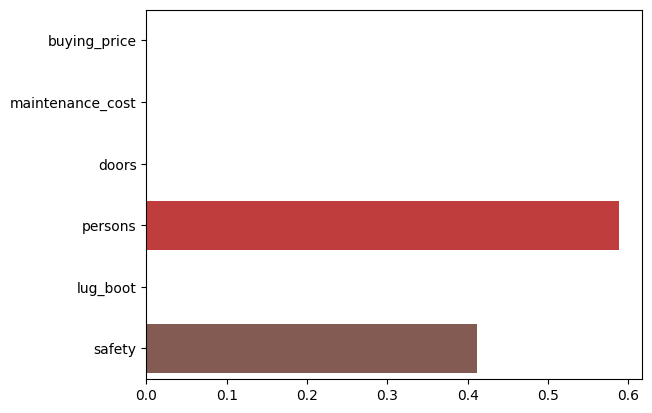

In [14]:
sns.barplot(pd.DataFrame([tree.feature_importances_], columns=X.columns), orient='h')

<Axes: >

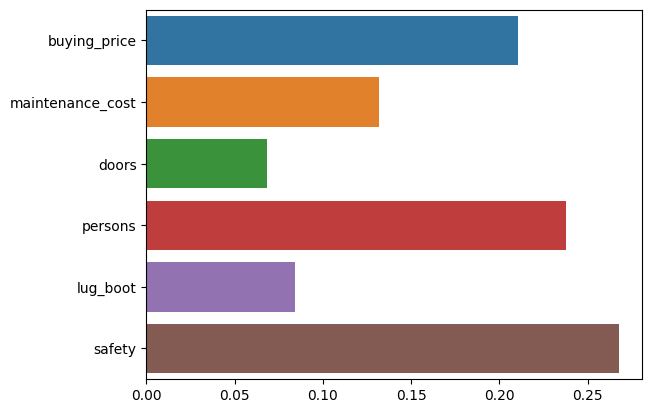

In [15]:
sns.barplot(pd.DataFrame([random_forest.feature_importances_], columns=X.columns), orient='h')